In [1]:
import time
import pandas as pd
from tqdm import tqdm
import json

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
list_ = []
with open(r"C:\Users\samue\OneDrive - HKUST Connect\year 2 spring\UROP 1100\data\News_Category_Dataset_v2.json") as files:
    for file in files:
        list_.append(json.loads(file))
df = pd.DataFrame(list_)
df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.headline, df.category, test_size=0.3, random_state=42)
print(f"training data: {len(X_train)}")
print(f"testing data: {len(X_test)}")
print(f"categories: {len(set(y_test))}")

training data: 140597
testing data: 60256
categories: 41


In [4]:
def train(pipeline, X_train, y_train, X_test, y_test):
    # define pipeline
    pipe = Pipeline(pipeline)

    # train model
    train_start = time.time()
    pipe.fit(X_train, y_train)
    train_time = time.time() - train_start

    # test model
    test_start = time.time()
    score = pipe.score(X_test, y_test)
    test_time = time.time() - test_start

    model_name = '+'.join([pipe[0] for pipe in pipeline])

    return model_name, score, train_time, test_time


In [5]:
vectorizer = ('tfidf', TfidfVectorizer(stop_words="english"))
model = [
('sgd', SGDClassifier()), 
('ridge', RidgeClassifier()),
('perceptron', Perceptron()),
('passiveaggressive', PassiveAggressiveClassifier()),
('kNN', KNeighborsClassifier()),
('svc', LinearSVC()),
('multi_NB', MultinomialNB()),
('CNB', ComplementNB()),
('logreg', LogisticRegression())
]

In [6]:
results = []
# loop models to get result
for ind in tqdm(range(len(model))):
    pipeline = [vectorizer, model[ind]]
    result = train(pipeline, X_train, y_train, X_test, y_test)
    results.append(result)

 89%|████████▉ | 8/9 [05:35<00:33, 33.08s/it]C:\Users\samue\anaconda3\envs\urop\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
100%|██████████| 9/9 [06:47<00:00, 45.28s/it]


In [7]:
result_df = pd.DataFrame(results, columns=['model', 'accuracy', 'train_time', 'test_time'])
result_df.index = result_df['model']
result_df

,model,accuracy,train_time,test_time
model,,,,
tfidf+sgd,tfidf+sgd,0.546784,19.330003,0.909998
tfidf+ridge,tfidf+ridge,0.573354,17.956002,0.785999
tfidf+perceptron,tfidf+perceptron,0.491453,17.370009,1.302000
tfidf+passiveaggressive,tfidf+passiveaggressive,0.515915,38.022007,1.687997
tfidf+kNN,tfidf+kNN,0.161378,3.754996,213.774000
tfidf+svc,tfidf+svc,0.577801,12.917006,0.675994
tfidf+multi_NB,tfidf+multi_NB,0.412009,2.825998,0.677002
tfidf+CNB,tfidf+CNB,0.546087,2.944973,0.689003
tfidf+logreg,tfidf+logreg,0.564425,71.158469,0.742993


<AxesSubplot:ylabel='model'>

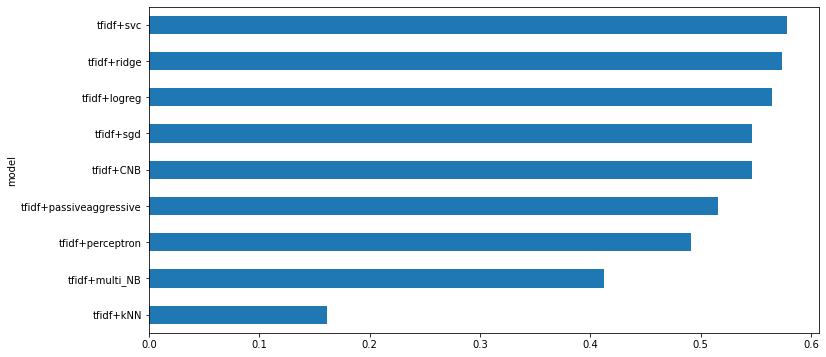

In [8]:
result_df.sort_values(by='accuracy').accuracy.plot(kind='barh', figsize=(12,6))

In [9]:
result_df.to_csv("kaggle.csv")